# Part 1 - Data Analysis and Bayes Nets

In [1]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required

In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [3]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request

In [4]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
# Reading the dataset from the path
data = pd.read_csv("C:\\Users\Arif\Documents\F21DL\dataset\crxdata.csv")

In [6]:
# Display the first five rows of the dataset
data.head(5)

,b,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1,+
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+


In [7]:
# Changing the column names so that they make more sense
data.columns=['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'Citizen', 'ZipCode', 'Income','ApprovalStatus']

In [8]:
data.head(5)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+


In [9]:
# Displaying the categorical data in the attribute
data["Married"].value_counts()

u    518
y    163
?      6
l      2
Name: Married, dtype: int64

In [10]:
# Replacing the column values with numbers
Married_Num = {"u":0, "y":1, "?":2, "l":3}
data =  data.replace({"Married":Married_Num})

In [11]:
data.head(10)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,a,58.67,4.460,0,g,q,h,3.040,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,0,g,q,h,1.500,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,0,g,w,v,3.750,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,0,g,w,v,1.710,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,0,g,m,v,2.500,t,f,0,t,g,00360,0,+
5,b,33.17,1.040,0,g,r,h,6.500,t,f,0,t,g,00164,31285,+
6,a,22.92,11.585,0,g,cc,v,0.040,t,f,0,f,g,00080,1349,+
7,b,54.42,0.500,1,p,k,h,3.960,t,f,0,f,g,00180,314,+
8,b,42.50,4.915,1,p,w,v,3.165,t,f,0,t,g,00052,1442,+
9,b,22.08,0.830,0,g,c,h,2.165,f,f,0,t,g,00128,0,+


In [12]:
# Displaying the categorical data in the attribute
data["Gender"].value_counts()

b    467
a    210
?     12
Name: Gender, dtype: int64

In [13]:
# Replacing the column values with numbers
Gender_Num = {"a":0, "b":1, "?":2}
data =  data.replace({"Gender":Gender_Num})

In [14]:
data.head(10)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,0,58.67,4.460,0,g,q,h,3.040,t,t,6,f,g,00043,560,+
1,0,24.50,0.500,0,g,q,h,1.500,t,f,0,f,g,00280,824,+
2,1,27.83,1.540,0,g,w,v,3.750,t,t,5,t,g,00100,3,+
3,1,20.17,5.625,0,g,w,v,1.710,t,f,0,f,s,00120,0,+
4,1,32.08,4.000,0,g,m,v,2.500,t,f,0,t,g,00360,0,+
5,1,33.17,1.040,0,g,r,h,6.500,t,f,0,t,g,00164,31285,+
6,0,22.92,11.585,0,g,cc,v,0.040,t,f,0,f,g,00080,1349,+
7,1,54.42,0.500,1,p,k,h,3.960,t,f,0,f,g,00180,314,+
8,1,42.50,4.915,1,p,w,v,3.165,t,f,0,t,g,00052,1442,+
9,1,22.08,0.830,0,g,c,h,2.165,f,f,0,t,g,00128,0,+


In [15]:
# Displaying the categorical data in the attribute
data["BankCustomer"].value_counts()

g     518
p     163
?       6
gg      2
Name: BankCustomer, dtype: int64

In [16]:
# Replacing the column values with numbers
BankCus_Num = {"g":0, "p":1, "?":2, "gg":3}
data =  data.replace({"BankCustomer":BankCus_Num})

In [17]:
# Displaying the categorical data in the attribute
data["EducationLevel"].value_counts()

c     137
q      78
w      63
i      59
aa     54
ff     53
k      51
cc     41
m      38
x      38
d      30
e      25
j      10
?       9
r       3
Name: EducationLevel, dtype: int64

In [18]:
# Replacing the column values with numbers
Edu_Num = {"c":0, "q":1, "w":2, "i":3,"aa":4,"ff":5,"k":6,"cc":7,"m":8,"x":9,"d":10,"e":11,"j":12,"?":13,"r":14}
data =  data.replace({"EducationLevel":Edu_Num})

In [19]:
# Displaying the categorical data in the attribute
data["Ethnicity"].value_counts()

v     398
h     138
bb     59
ff     57
?       9
j       8
z       8
dd      6
n       4
o       2
Name: Ethnicity, dtype: int64

In [20]:
# Replacing the column values with numbers
Eth_Num = {"v":0, "h":1, "bb":2, "ff":3, "?":4, "j":5, "z":6, "dd":7, "n":8, "o":9}
data =  data.replace({"Ethnicity":Eth_Num})

In [21]:
data.head(10)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,0,58.67,4.460,0,0,1,1,3.040,t,t,6,f,g,00043,560,+
1,0,24.50,0.500,0,0,1,1,1.500,t,f,0,f,g,00280,824,+
2,1,27.83,1.540,0,0,2,0,3.750,t,t,5,t,g,00100,3,+
3,1,20.17,5.625,0,0,2,0,1.710,t,f,0,f,s,00120,0,+
4,1,32.08,4.000,0,0,8,0,2.500,t,f,0,t,g,00360,0,+
5,1,33.17,1.040,0,0,14,1,6.500,t,f,0,t,g,00164,31285,+
6,0,22.92,11.585,0,0,7,0,0.040,t,f,0,f,g,00080,1349,+
7,1,54.42,0.500,1,1,6,1,3.960,t,f,0,f,g,00180,314,+
8,1,42.50,4.915,1,1,2,0,3.165,t,f,0,t,g,00052,1442,+
9,1,22.08,0.830,0,0,0,1,2.165,f,f,0,t,g,00128,0,+


In [22]:
# Displaying the categorical data in the attribute
data["PriorDefault"].value_counts()

t    360
f    329
Name: PriorDefault, dtype: int64

In [23]:
# Replacing the column values with numbers
Pdf_Num = {"t":0, "f":1}
data =  data.replace({"PriorDefault":Pdf_Num})

In [24]:
data.head(10)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,0,58.67,4.460,0,0,1,1,3.040,0,t,6,f,g,00043,560,+
1,0,24.50,0.500,0,0,1,1,1.500,0,f,0,f,g,00280,824,+
2,1,27.83,1.540,0,0,2,0,3.750,0,t,5,t,g,00100,3,+
3,1,20.17,5.625,0,0,2,0,1.710,0,f,0,f,s,00120,0,+
4,1,32.08,4.000,0,0,8,0,2.500,0,f,0,t,g,00360,0,+
5,1,33.17,1.040,0,0,14,1,6.500,0,f,0,t,g,00164,31285,+
6,0,22.92,11.585,0,0,7,0,0.040,0,f,0,f,g,00080,1349,+
7,1,54.42,0.500,1,1,6,1,3.960,0,f,0,f,g,00180,314,+
8,1,42.50,4.915,1,1,2,0,3.165,0,f,0,t,g,00052,1442,+
9,1,22.08,0.830,0,0,0,1,2.165,1,f,0,t,g,00128,0,+


In [25]:
# Displaying the categorical data in the attribute
data["Employed"].value_counts()

f    395
t    294
Name: Employed, dtype: int64

In [26]:
# Replacing the column values with numbers
Emp_Num = {"f":0, "t":1}
data =  data.replace({"Employed":Emp_Num})

In [27]:
# Displaying the categorical data in the attribute
data["DriversLicense"].value_counts()

f    373
t    316
Name: DriversLicense, dtype: int64

In [28]:
# Replacing the column values with numbers
DL_Num = {"f":0, "t":1}
data =  data.replace({"DriversLicense":DL_Num})

In [29]:
# Displaying the categorical data in the attributedata["Citizen"].value_counts()

In [30]:
# Replacing the column values with numbers
Citizen_Num = {"g":0, "s":1, "p":3}
data =  data.replace({"Citizen":Citizen_Num})

In [31]:
data.head(10)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,0,58.67,4.460,0,0,1,1,3.040,0,1,6,0,0,00043,560,+
1,0,24.50,0.500,0,0,1,1,1.500,0,0,0,0,0,00280,824,+
2,1,27.83,1.540,0,0,2,0,3.750,0,1,5,1,0,00100,3,+
3,1,20.17,5.625,0,0,2,0,1.710,0,0,0,0,1,00120,0,+
4,1,32.08,4.000,0,0,8,0,2.500,0,0,0,1,0,00360,0,+
5,1,33.17,1.040,0,0,14,1,6.500,0,0,0,1,0,00164,31285,+
6,0,22.92,11.585,0,0,7,0,0.040,0,0,0,0,0,00080,1349,+
7,1,54.42,0.500,1,1,6,1,3.960,0,0,0,0,0,00180,314,+
8,1,42.50,4.915,1,1,2,0,3.165,0,0,0,1,0,00052,1442,+
9,1,22.08,0.830,0,0,0,1,2.165,1,0,0,1,0,00128,0,+


In [32]:
# Displaying the categorical data in the attribute
data["ApprovalStatus"].value_counts()

-    383
+    306
Name: ApprovalStatus, dtype: int64

In [33]:
# Replacing the column values with numbers
AppStats = {"+":1, "-":0}
data = data.replace({"ApprovalStatus":AppStats})

In [34]:
# This method prints information about a DataFrame including the dtype and columns, non-null values and memory usage.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          689 non-null    int64  
 1   Age             689 non-null    object 
 2   Debt            689 non-null    float64
 3   Married         689 non-null    int64  
 4   BankCustomer    689 non-null    int64  
 5   EducationLevel  689 non-null    int64  
 6   Ethnicity       689 non-null    int64  
 7   YearsEmployed   689 non-null    float64
 8   PriorDefault    689 non-null    int64  
 9   Employed        689 non-null    int64  
 10  CreditScore     689 non-null    int64  
 11  DriversLicense  689 non-null    int64  
 12  Citizen         689 non-null    int64  
 13  ZipCode         689 non-null    object 
 14  Income          689 non-null    int64  
 15  ApprovalStatus  689 non-null    int64  
dtypes: float64(2), int64(12), object(2)
memory usage: 86.2+ KB


In [35]:
data.head(10)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,0,58.67,4.460,0,0,1,1,3.040,0,1,6,0,0,00043,560,1
1,0,24.50,0.500,0,0,1,1,1.500,0,0,0,0,0,00280,824,1
2,1,27.83,1.540,0,0,2,0,3.750,0,1,5,1,0,00100,3,1
3,1,20.17,5.625,0,0,2,0,1.710,0,0,0,0,1,00120,0,1
4,1,32.08,4.000,0,0,8,0,2.500,0,0,0,1,0,00360,0,1
5,1,33.17,1.040,0,0,14,1,6.500,0,0,0,1,0,00164,31285,1
6,0,22.92,11.585,0,0,7,0,0.040,0,0,0,0,0,00080,1349,1
7,1,54.42,0.500,1,1,6,1,3.960,0,0,0,0,0,00180,314,1
8,1,42.50,4.915,1,1,2,0,3.165,0,0,0,1,0,00052,1442,1
9,1,22.08,0.830,0,0,0,1,2.165,1,0,0,1,0,00128,0,1


In [36]:
data["Age"].value_counts()

?        12
22.67     9
20.42     7
25.00     6
19.17     6
         ..
28.33     1
18.75     1
18.50     1
40.25     1
36.42     1
Name: Age, Length: 349, dtype: int64

In [37]:
AgeData = {"?":0}
data = data.replace({"Age":AgeData})

In [38]:
data = data.astype({"Age": float})

In [39]:
data["ZipCode"].value_counts()

00000    132
00120     35
00200     35
00160     34
00100     30
        ... 
00393      1
00395      1
00093      1
00204      1
00256      1
Name: ZipCode, Length: 170, dtype: int64

In [40]:
ZipData = {"?":0}
data = data.replace({"ZipCode":ZipData})

In [41]:
data = data.astype({"ZipCode": int})

In [42]:
# Displaying the categorical data in the attribute
data["Ethnicity"].value_counts()

0    398
1    138
2     59
3     57
4      9
5      8
6      8
7      6
8      4
9      2
Name: Ethnicity, dtype: int64

In [43]:
#This method shows a statistical summary of the numerical attributes 
data.describe()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
count,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000
mean,0.712627,31.019434,4.765631,0.262700,0.262700,4.288824,0.933237,2.224819,0.477504,0.426705,2.402032,0.458636,0.117562,180.516691,1018.862119,0.444122
std,0.489868,12.561195,4.978470,0.478387,0.478387,3.677699,1.539655,3.348739,0.499857,0.494958,4.866180,0.498648,0.416724,174.094785,5213.743149,0.497229
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.420000,1.000000,0.000000,0.000000,1.000000,0.000000,0.165000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,0.000000
50%,1.000000,28.170000,2.750000,0.000000,0.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,160.000000,5.000000,0.000000
75%,1.000000,37.750000,7.250000,0.000000,0.000000,7.000000,1.000000,2.625000,1.000000,1.000000,3.000000,1.000000,0.000000,272.000000,396.000000,1.000000
max,2.000000,80.250000,28.000000,3.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.000000,1.000000,3.000000,2000.000000,100000.000000,1.000000


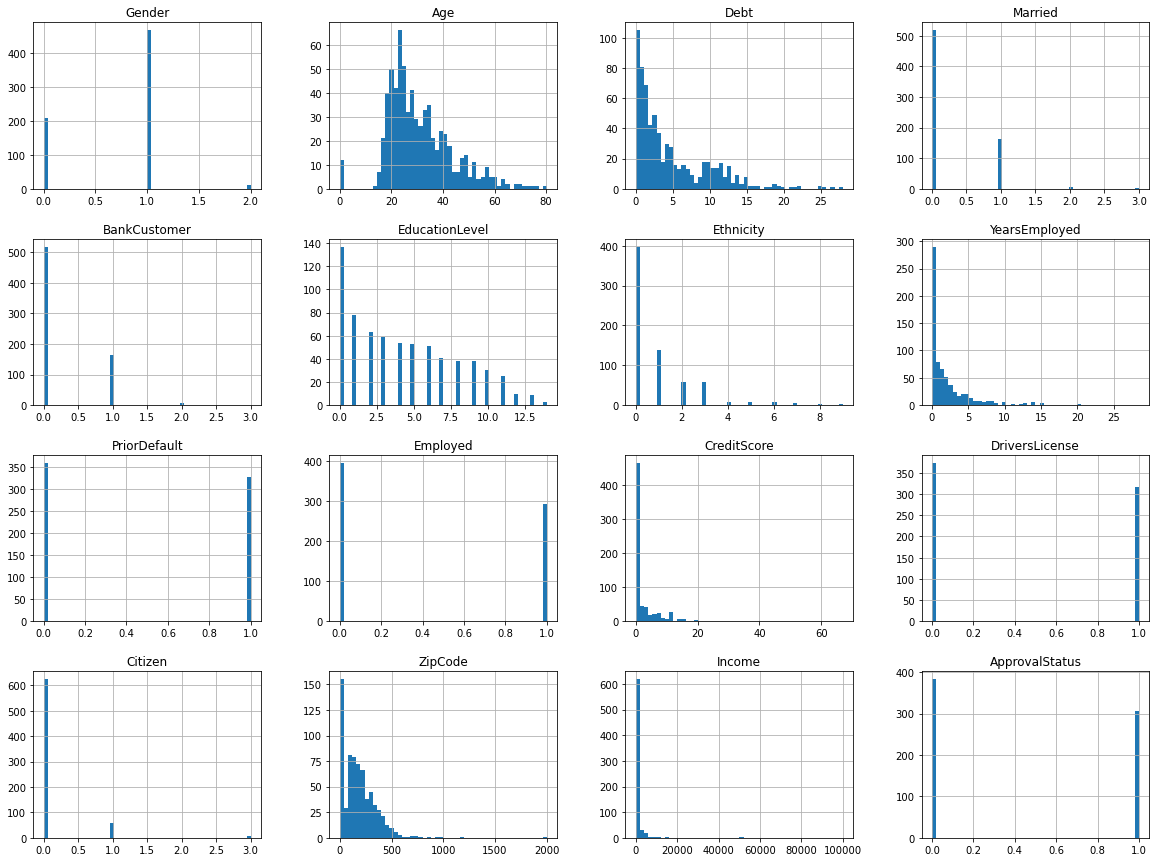

In [44]:
#To plot a histogram for each numerical attribute
data.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot:xlabel='Debt', ylabel='CreditScore'>

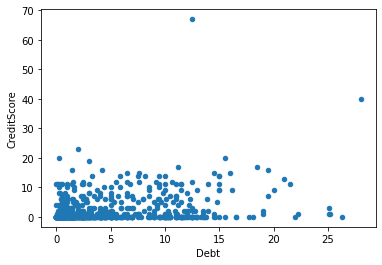

In [45]:
data.plot(kind="scatter", x="Debt", y="CreditScore")

<AxesSubplot:xlabel='Debt', ylabel='CreditScore'>

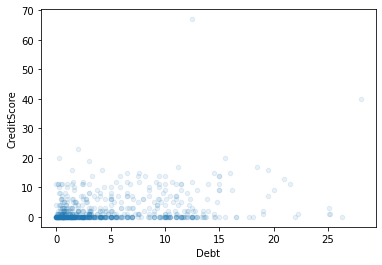

In [46]:
data.plot(kind="scatter", x="Debt", y="CreditScore", alpha=0.1)

In [47]:
# computing the standard correlation coefficient (Pearson’s r) between every pair of attributes
corr_matrix = data.corr()

In [48]:
corr_matrix["ApprovalStatus"].sort_values(ascending=False)

ApprovalStatus    1.000000
Employed          0.457284
CreditScore       0.407270
YearsEmployed     0.323260
Debt              0.208171
Age               0.177323
Income            0.176138
DriversLicense    0.033165
EducationLevel   -0.001097
Ethnicity        -0.035258
Citizen          -0.041905
Gender           -0.042152
ZipCode          -0.099890
Married          -0.130679
BankCustomer     -0.130679
PriorDefault     -0.719987
Name: ApprovalStatus, dtype: float64

array([[<AxesSubplot:xlabel='Employed', ylabel='Employed'>,
        <AxesSubplot:xlabel='CreditScore', ylabel='Employed'>,
        <AxesSubplot:xlabel='PriorDefault', ylabel='Employed'>,
        <AxesSubplot:xlabel='YearsEmployed', ylabel='Employed'>],
       [<AxesSubplot:xlabel='Employed', ylabel='CreditScore'>,
        <AxesSubplot:xlabel='CreditScore', ylabel='CreditScore'>,
        <AxesSubplot:xlabel='PriorDefault', ylabel='CreditScore'>,
        <AxesSubplot:xlabel='YearsEmployed', ylabel='CreditScore'>],
       [<AxesSubplot:xlabel='Employed', ylabel='PriorDefault'>,
        <AxesSubplot:xlabel='CreditScore', ylabel='PriorDefault'>,
        <AxesSubplot:xlabel='PriorDefault', ylabel='PriorDefault'>,
        <AxesSubplot:xlabel='YearsEmployed', ylabel='PriorDefault'>],
       [<AxesSubplot:xlabel='Employed', ylabel='YearsEmployed'>,
        <AxesSubplot:xlabel='CreditScore', ylabel='YearsEmployed'>,
        <AxesSubplot:xlabel='PriorDefault', ylabel='YearsEmployed'>,
        <Ax

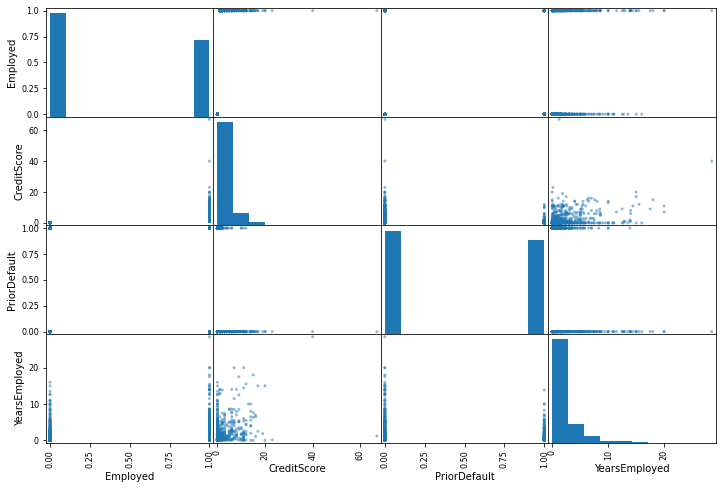

In [49]:
# plot 4 promising  numerical attributes against each other
from pandas.plotting import scatter_matrix

attributes = ["Employed","CreditScore","PriorDefault","YearsEmployed"]
scatter_matrix(data[attributes], figsize=(12, 8))

(0.0, 2.0, 0.0, 100.0)

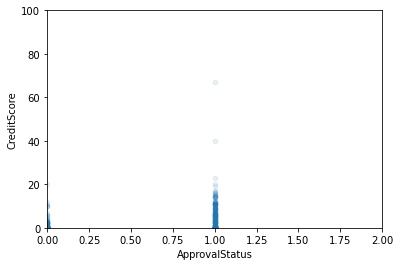

In [50]:
data.plot(kind="scatter", x="ApprovalStatus", y="CreditScore",
             alpha=0.1)
plt.axis([0, 2, 0, 100])

In [51]:
sample_incomplete_rows = data[data.isnull().any(axis=1)].head()
sample_incomplete_rows   # display rows with missing values

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus


In [52]:
from sklearn.model_selection import train_test_split

target = data['ApprovalStatus']
inputs = data[data.columns.difference(['ApprovalStatus'])]

X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.25, random_state = 42)

In [53]:
X_train

,Age,BankCustomer,Citizen,CreditScore,Debt,DriversLicense,EducationLevel,Employed,Ethnicity,Gender,Income,Married,PriorDefault,YearsEmployed,ZipCode
645,20.83,0,0,0,8.500,0,0,0,0,0,351,0,1,0.165,0
163,60.58,0,0,0,16.500,1,1,0,0,0,10561,0,0,11.000,21
380,22.67,0,0,0,7.000,0,0,0,0,0,0,0,1,0.165,160
602,20.08,0,0,0,0.250,0,1,0,0,1,0,0,1,0.125,200
431,21.83,0,0,0,1.540,1,6,0,0,1,0,0,1,0.085,356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,38.58,0,0,0,5.000,1,7,0,0,0,0,0,0,13.500,980
106,25.00,1,0,0,11.000,0,4,0,0,0,0,1,0,4.500,120
270,32.33,0,0,0,2.500,1,0,0,0,1,0,0,1,1.250,280
435,19.58,0,0,3,0.585,0,5,1,3,1,769,0,1,0.000,350


In [54]:
X_test

,Age,BankCustomer,Citizen,CreditScore,Debt,DriversLicense,EducationLevel,Employed,Ethnicity,Gender,Income,Married,PriorDefault,YearsEmployed,ZipCode
286,29.50,0,0,1,0.580,0,2,1,0,1,2803,0,1,0.290,340
655,25.67,0,0,1,3.250,1,0,1,1,1,21,0,1,2.290,416
257,20.75,0,0,0,9.540,0,3,0,0,0,1000,0,1,0.040,200
336,34.83,1,0,0,1.250,1,3,0,1,0,0,1,1,0.500,160
318,36.75,1,0,0,0.125,1,0,0,0,1,113,1,1,1.500,232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,32.42,0,0,0,3.000,1,10,0,0,1,0,0,1,0.165,120
215,41.17,0,0,8,4.040,0,7,1,1,1,0,0,0,7.000,320
628,19.58,0,0,0,0.665,0,2,0,0,0,5,0,1,1.665,220
390,39.92,0,0,0,5.000,0,3,0,2,1,0,0,1,0.210,550


In [55]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [56]:
y_pred = model.predict(X_test)

In [57]:
#from sklearn.model_selection import cross_val_predict

#y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

In [58]:
from sklearn.metrics import confusion_matrix
conmat = confusion_matrix(y_test, y_pred)

In [59]:
print(conmat)

[[81 13]
 [36 43]]


In [60]:
expected = y_train
predicted = model.predict(X_train)

In [61]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred))

[[81 13]
 [36 43]]


In [62]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, y_pred)

0.7678571428571429

In [63]:
recall_score(y_test, y_pred)

0.5443037974683544

In [64]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.637037037037037

# Part 2 - Clustering

In [65]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import rand_score

In [66]:
k = 4 # number of clusters
kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train)
y_pred = kmeans.predict(X_test)

In [67]:
# computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs
rand_score(y_test, y_pred)

0.5073262535287001

In [68]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0])

In [69]:
y_pred is kmeans.labels_

False

In [70]:
# Predicts the closest cluster each sample in X belongs to.
kmeans.cluster_centers_

array([[3.13757551e+01, 2.75510204e-01, 1.28571429e-01, 2.11020408e+00,
        4.69015306e+00, 4.59183673e-01, 4.36734694e+00, 3.95918367e-01,
        9.53061224e-01, 7.20408163e-01, 3.27259184e+02, 2.75510204e-01,
        5.12244898e-01, 2.10510204e+00, 1.81938776e+02],
       [2.86966667e+01, 5.55111512e-17, 0.00000000e+00, 2.00000000e+00,
        3.36000000e+00, 6.66666667e-01, 7.33333333e+00, 6.66666667e-01,
        3.33333333e-01, 6.66666667e-01, 3.60036667e+04, 5.55111512e-17,
        0.00000000e+00, 3.58333333e+00, 2.28000000e+02],
       [1.75000000e+01, 3.00000000e+00, 3.00000000e+00, 0.00000000e+00,
        2.20000000e+01, 1.00000000e+00, 5.00000000e+00, 0.00000000e+00,
        9.00000000e+00, 1.00000000e+00, 1.00000000e+05, 3.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 4.50000000e+02],
       [3.40759091e+01, 4.54545455e-02, 0.00000000e+00, 6.04545455e+00,
        7.65113636e+00, 1.81818182e-01, 4.36363636e+00, 7.27272727e-01,
        9.54545455e-01, 6.36363636e-0

In [71]:
kmeans.labels_

array([0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# GMM

In [72]:
# checks whether a cluster contains only samples belonging to a single class
from sklearn.metrics import homogeneity_score
from sklearn.mixture import GaussianMixture as EM

em = EM(n_components = 2, max_iter = 50, n_init = 1).fit(X_train)
y_pred = em.predict(X_train)
print(homogeneity_score(y_train, y_pred))

0.0046542211578546626


# Elbow Method

In [73]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_train)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

C:\Users\Arif\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [74]:
# It is calculated by measuring the distance between each data point 
# and its centroid, squaring this distance, and summing these squares across one cluster.
inertias

[15635896040.79891,
 4659233221.168525,
 2102852656.3659363,
 816570630.2048817,
 518743802.46331286,
 224769827.79582986,
 136463233.12957662,
 101831875.96960819,
 69029209.70708837]

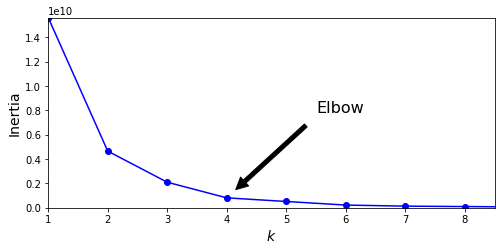

In [75]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 15635896040])
plt.show()

1. Unsupervised learning algorithm
2. Does not require a sub population. the model learns the subpopulation automatically.
3. Also called as EM clustering (Expextation Maximization Clustering)
4. Can be used to fill missing data

K-means
1. Easy to implement
2. Supports large dataset and faster on large dataset.
cons
1. Number of clusters have to be entered manually.

Elbow method
The elbow method is a heuristic used in determining the number of clusters in a data set.

# Part 3 - Decision  Trees

In [76]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.tree import export_text
from sklearn.metrics import accuracy_score 

decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree.fit(X_train, y_train)
pred = decision_tree.predict(X_test)
predx = decision_tree.predict(X_train)
print("Testing Accuracy: ",accuracy_score(y_test, pred))
print("Training Accuracy: ",accuracy_score(y_train,predx))

Testing Accuracy:  0.8497109826589595
Training Accuracy:  0.8643410852713178


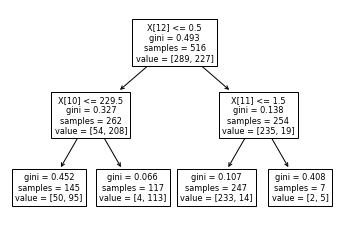

In [77]:
plot_tree(decision_tree);

# 10-fold cross-validation

In [78]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(decision_tree, X_train, y_train, cv=10)
scores

array([0.88461538, 0.82692308, 0.80769231, 0.88461538, 0.82692308,
       0.92307692, 0.84313725, 0.80392157, 0.88235294, 0.90196078])

In [79]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.86 accuracy with a standard deviation of 0.04


In [80]:
# Precision measure
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, pred)

0.7676767676767676

In [81]:
# Recall score
recall_score(y_test, pred)

0.9620253164556962

In [82]:
# F measure
from sklearn.metrics import f1_score

f1_score(y_test, pred)

0.8539325842696629

In [83]:
# ROC area
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, pred)
roc_auc

0.8586722326959333

# Changing Parameters

In [84]:
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=4, splitter="best", min_samples_leaf=2)
decision_tree.fit(X_train, y_train)
pred = decision_tree.predict(X_test)
predx = decision_tree.predict(X_train)
print("Testing Accuracy: ",accuracy_score(y_test, pred))
print("Training Accuracy: ",accuracy_score(y_train,predx))

Testing Accuracy:  0.8554913294797688
Training Accuracy:  0.8895348837209303


In [85]:
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=7, splitter="random", min_samples_leaf=3)
decision_tree.fit(X_train, y_train)
pred = decision_tree.predict(X_test)
predx = decision_tree.predict(X_train)
print("Testing Accuracy: ",accuracy_score(y_test, pred))
print("Training Accuracy: ",accuracy_score(y_train,predx))

Testing Accuracy:  0.8439306358381503
Training Accuracy:  0.8972868217054264


In [86]:
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=9, splitter="best", min_samples_leaf=4)
decision_tree.fit(X_train, y_train)
pred = decision_tree.predict(X_test)
predx = decision_tree.predict(X_train)
print("Testing Accuracy: ",accuracy_score(y_test, pred))
print("Training Accuracy: ",accuracy_score(y_train,predx))

Testing Accuracy:  0.7861271676300579
Training Accuracy:  0.9321705426356589


In [87]:
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=8, splitter="random", min_samples_leaf=2)
decision_tree.fit(X_train, y_train)
pred = decision_tree.predict(X_test)
predx = decision_tree.predict(X_train)
print("Testing Accuracy: ",accuracy_score(y_test, pred))
print("Training Accuracy: ",accuracy_score(y_train,predx))

Testing Accuracy:  0.7803468208092486
Training Accuracy:  0.9108527131782945


# 50% used for testing

In [88]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(inputs, target, test_size = 0.50, random_state = 42)

In [89]:
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree.fit(X_train2, y_train2)
pred2 = decision_tree.predict(X_test2)
predx2 = decision_tree.predict(X_train2)
print("Testing Accuracy: ",accuracy_score(y_test2, pred2))
print("Training Accuracy: ",accuracy_score(y_train2,predx2))

Testing Accuracy:  0.8463768115942029
Training Accuracy:  0.875


# 80% used for testing

In [90]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(inputs, target, test_size = 0.80, random_state = 42)

In [91]:
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree.fit(X_train2, y_train2)
pred2 = decision_tree.predict(X_test2)
predx2 = decision_tree.predict(X_train2)
print("Testing Accuracy: ",accuracy_score(y_test2, pred2))
print("Training Accuracy: ",accuracy_score(y_train2,predx2))

Testing Accuracy:  0.8568840579710145
Training Accuracy:  0.8759124087591241


# Random Forest

In [92]:
from sklearn.ensemble import RandomForestClassifier

Random_clf = RandomForestClassifier(max_depth=2, random_state=0)
Random_clf.fit(X_train, y_train)
pred2 = Random_clf.predict(X_test)
predx = decision_tree.predict(X_train)
print("Testing Accuracy: ",accuracy_score(y_test, pred2))
print("Training Accuracy: ",accuracy_score(y_train,predx))

Testing Accuracy:  0.8439306358381503
Training Accuracy:  0.8643410852713178


In [93]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Random_clf, X_train, y_train, cv=10)
scores

array([0.88461538, 0.88461538, 0.84615385, 0.75      , 0.78846154,
       0.92307692, 0.88235294, 0.80392157, 0.90196078, 0.80392157])

In [94]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.85 accuracy with a standard deviation of 0.05


In [95]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, pred2)

0.8823529411764706

In [96]:
recall_score(y_test, pred2)

0.759493670886076

In [97]:
from sklearn.metrics import f1_score

f1_score(y_test, pred2)

0.8163265306122449

In [98]:
# ROC area
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, pred2)
roc_auc

0.8371936439536762

In [99]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(inputs, target, test_size = 0.50, random_state = 42)

In [100]:
Random_clf = RandomForestClassifier(max_depth=2, random_state=0)
Random_clf.fit(X_train, y_train)
pred2 = Random_clf.predict(X_test2)
predx2 = Random_clf.predict(X_train2)
print("Testing Accuracy: ",accuracy_score(y_test2, pred2))
print("Training Accuracy: ",accuracy_score(y_train2,predx2))

Testing Accuracy:  0.8579710144927536
Training Accuracy:  0.8546511627906976


In [101]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(inputs, target, test_size = 0.80, random_state = 42)

In [102]:
Random_clf = RandomForestClassifier(max_depth=2, random_state=0)
Random_clf.fit(X_train, y_train)
pred2 = Random_clf.predict(X_test2)
predx2 = Random_clf.predict(X_train2)
print("Testing Accuracy: ",accuracy_score(y_test2, pred2))
print("Training Accuracy: ",accuracy_score(y_train2,predx2))

Testing Accuracy:  0.8532608695652174
Training Accuracy:  0.8686131386861314


# Part 4 - Neural Networks and Convolutional Neural Networks

In [117]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg.intercept_, lin_reg.coef_

(0.6605087478886228,
 array([-4.95344315e-04, -2.70761117e-02,  1.33215291e-01,  9.38598618e-03,
        -1.42523073e-03, -4.20825867e-02,  8.42840115e-03,  1.40247097e-01,
        -1.02596273e-02,  3.65065084e-03,  9.57250455e-06, -2.70761117e-02,
        -6.11541985e-01,  9.26800341e-03, -1.10456206e-04]))

In [103]:
# stochastic gradient descent (SGD) learning
# the gradient of the loss is estimated each sample and
# is updated by decreasing learning rate

from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

linear_clf = make_pipeline(StandardScaler(),SGDClassifier(max_iter=1000, tol=1e-3))
linear_clf.fit(X_train, y_train)

pred = linear_clf.predict(X_test)
predx = linear_clf.predict(X_train)

print("Testing Accuracy: ",accuracy_score(y_test, pred))
print("Training Accuracy: ",accuracy_score(y_train,predx))

Testing Accuracy:  0.7745664739884393
Training Accuracy:  0.8197674418604651


In [104]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(linear_clf, X_train, y_train, cv=10)
scores

array([0.80769231, 0.84615385, 0.75      , 0.80769231, 0.71153846,
       0.84615385, 0.74509804, 0.84313725, 0.82352941, 0.90196078])

# Multi Layer Perceptron

In [105]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

X_train3, X_test3, y_train3, y_test3 = train_test_split(inputs, target, test_size = 0.35, random_state = 42)

mlp_clf = MLPClassifier(random_state=1, max_iter=300, activation = "logistic", learning_rate_init = 0.008, 
                        momentum = 0.9, validation_fraction = 0.2).fit(X_train, y_train)

pred = mlp_clf.predict(X_test3)
predx = mlp_clf.predict(X_train3)

print("Testing Accuracy: ",accuracy_score(y_test3, pred))
print("Training Accuracy: ",accuracy_score(y_train3,predx))

Testing Accuracy:  0.8140495867768595
Training Accuracy:  0.9105145413870246


In [106]:
mlp_clf = MLPClassifier(random_state=1, max_iter=450, activation = "logistic", learning_rate_init = 0.088, 
                        momentum = 0.9, validation_fraction = 0.25).fit(X_train, y_train)

pred = mlp_clf.predict(X_test3)
predx = mlp_clf.predict(X_train3)

print("Testing Accuracy: ",accuracy_score(y_test3, pred))
print("Training Accuracy: ",accuracy_score(y_train3,predx))

Testing Accuracy:  0.7272727272727273
Training Accuracy:  0.785234899328859


In [107]:
mlp_clf = MLPClassifier(random_state=1, max_iter=400, activation = "tanh", learning_rate_init = 0.05, 
                        momentum = 0.09, validation_fraction = 0.4).fit(X_train, y_train)

pred = mlp_clf.predict(X_test3)
predx = mlp_clf.predict(X_train3)

print("Testing Accuracy: ",accuracy_score(y_test3, pred))
print("Training Accuracy: ",accuracy_score(y_train3,predx))

Testing Accuracy:  0.6983471074380165
Training Accuracy:  0.7695749440715883


In [108]:
mlp_clf = MLPClassifier(random_state=1, max_iter=270, activation = "identity", learning_rate_init = 0.09, 
                        momentum = 0.9, validation_fraction = 0.6).fit(X_train, y_train)

pred = mlp_clf.predict(X_test3)
predx = mlp_clf.predict(X_train3)

print("Testing Accuracy: ",accuracy_score(y_test3, pred))
print("Training Accuracy: ",accuracy_score(y_train3,predx))

Testing Accuracy:  0.7355371900826446
Training Accuracy:  0.756152125279642


In [109]:
mlp_clf = MLPClassifier(random_state=1, max_iter=100, activation = "logistic", learning_rate_init = 0.08,
                        momentum = 0.9, validation_fraction = 0.8).fit(X_train, y_train)

pred = mlp_clf.predict(X_test3)
predx = mlp_clf.predict(X_train3)

print("Testing Accuracy: ",accuracy_score(y_test3, pred))
print("Training Accuracy: ",accuracy_score(y_train3,predx))

Testing Accuracy:  0.7396694214876033
Training Accuracy:  0.7718120805369127


In [110]:
mlp_clf = MLPClassifier(random_state=1, max_iter=100, activation = "identity", learning_rate_init = 0.05,
                        momentum = 0.5, validation_fraction = 0.5).fit(X_train, y_train)

pred = mlp_clf.predict(X_test3)
predx = mlp_clf.predict(X_train3)

print("Testing Accuracy: ",accuracy_score(y_test3, pred))
print("Training Accuracy: ",accuracy_score(y_train3,predx))

Testing Accuracy:  0.7396694214876033
Training Accuracy:  0.7807606263982103


In [111]:
mlp_clf.predict(X_test[:5])

array([1, 0, 1, 0, 0], dtype=int64)

In [112]:
mlp_clf.score(X_test, y_test)

0.7167630057803468

# Research Question

# 1. Ethnicity is a protected status and the decision to approve or deny an application cannot be based on the applicant’s ethnicity. Is there a statistically significant difference in how credit is granted between ethnicities that could indicate bias or discrimination? Contrarily, could the difference indicate a business opportunity?

In [118]:
data["Ethnicity"].value_counts()

0    398
1    138
2     59
3     57
4      9
5      8
6      8
7      6
8      4
9      2
Name: Ethnicity, dtype: int64

In [119]:
data.head(20)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,0,58.67,4.460,0,0,1,1,3.040,0,1,6,0,0,43,560,1
1,0,24.50,0.500,0,0,1,1,1.500,0,0,0,0,0,280,824,1
2,1,27.83,1.540,0,0,2,0,3.750,0,1,5,1,0,100,3,1
3,1,20.17,5.625,0,0,2,0,1.710,0,0,0,0,1,120,0,1
4,1,32.08,4.000,0,0,8,0,2.500,0,0,0,1,0,360,0,1
5,1,33.17,1.040,0,0,14,1,6.500,0,0,0,1,0,164,31285,1
6,0,22.92,11.585,0,0,7,0,0.040,0,0,0,0,0,80,1349,1
7,1,54.42,0.500,1,1,6,1,3.960,0,0,0,0,0,180,314,1
8,1,42.50,4.915,1,1,2,0,3.165,0,0,0,1,0,52,1442,1
9,1,22.08,0.830,0,0,0,1,2.165,1,0,0,1,0,128,0,1


In [122]:
data["ApprovalStatus"].value_counts()

0    383
1    306
Name: ApprovalStatus, dtype: int64

From this dataset, out of 689 applications, 383 were approved and 306 were declined. So there does not seem to be a definite effect of ethnicity on the approval.

# 2. Is there a correlation between Age, Income, Credit Score, and Debt levels and the credit approval status? Can this relationship be used to predict if a person is granted credit? If yes, does the relationship indicate reasonable risk management strategies?

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Income', ylabel='Age'>,
        <AxesSubplot:xlabel='Debt', ylabel='Age'>,
        <AxesSubplot:xlabel='CreditScore', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='Income'>,
        <AxesSubplot:xlabel='Income', ylabel='Income'>,
        <AxesSubplot:xlabel='Debt', ylabel='Income'>,
        <AxesSubplot:xlabel='CreditScore', ylabel='Income'>],
       [<AxesSubplot:xlabel='Age', ylabel='Debt'>,
        <AxesSubplot:xlabel='Income', ylabel='Debt'>,
        <AxesSubplot:xlabel='Debt', ylabel='Debt'>,
        <AxesSubplot:xlabel='CreditScore', ylabel='Debt'>],
       [<AxesSubplot:xlabel='Age', ylabel='CreditScore'>,
        <AxesSubplot:xlabel='Income', ylabel='CreditScore'>,
        <AxesSubplot:xlabel='Debt', ylabel='CreditScore'>,
        <AxesSubplot:xlabel='CreditScore', ylabel='CreditScore'>]],
      dtype=object)

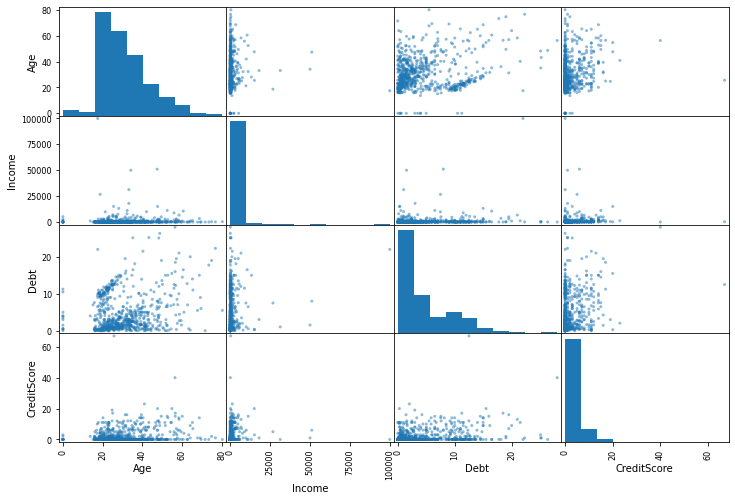

In [123]:
attributes = ["Age","Income","Debt","CreditScore"]
scatter_matrix(data[attributes], figsize=(12, 8))

From the visual data, we can observe the following:
1. People in the age group of 20 to 40 seem to have a good credit score.
2. At the same time, the people in the same age group seem to have a good amount of debts.
3. The correlating factor is that prople with higher credit scores and low debts.